## Install transformers

In [40]:
pip install transformers torch

In [41]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

2. Extract Embeddings:
Identify the sub-words or words that constitute the event you are interested in.
Retrieve the corresponding contextualized embedding vectors for those sub-words.
Calculate the average of these embedding vectors to obtain a single vector representing the event's context.

In [42]:
'''
last_hidden_states[:, 1:-1, :] # gets all hidden states except the first and last
'''

my_full_sentence = 'The quick brown fox jumps over the lazy dog.'
my_event_1 = 'quick brown fox' # Identify the sub-words or words that constitute the event you are interested in.
my_event_2 = 'lazy dog'
event_1_first_token = my_event_1.split(' ')[0]
event_1_last_token = my_event_1.split(' ')[-1]
event_2_first_token = my_event_2.split(' ')[0]
event_2_last_token = my_event_2.split(' ')[-1]

# Tokenize the text
inputs = tokenizer(my_full_sentence, return_tensors='pt')

# Obtain the embeddings
with torch.no_grad():
    outputs = model(**inputs)

# Extract the last hidden state (embeddings)
last_hidden_states = outputs.last_hidden_state

# Print the dimensions of the embeddings
print("Shape of the last hidden state (embeddings):", last_hidden_states.shape)

# Define tokens
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

#event1
event_1_hidden_states = last_hidden_states[:, [tokens.index(event_1_first_token)-tokens.index(event_1_last_token)], :] #get hidden states for event / contextualized embedding vectors for event words
event_1_average_embedding = torch.mean(event_1_hidden_states, dim=1).numpy() #Calculate average of embedding vectors to obtain a single vector representing the event's context.

#event2
event_2_hidden_states = last_hidden_states[:, [tokens.index(event_2_first_token)-tokens.index(event_2_last_token)], :] #get the hidden states for the event
event_2_average_embedding = torch.mean(event_2_hidden_states, dim=1).numpy()

sentence_embedding = torch.mean(last_hidden_states, dim=1).numpy()  # Average token embeddings

Shape of the last hidden state (embeddings): torch.Size([1, 12, 768])


In [19]:
sentence_embedding

array([[-1.44644780e-02, -7.48864114e-02,  5.63669913e-02,
         4.51664394e-03,  4.08910543e-01,  2.58027967e-02,
        -7.56111816e-02,  4.74532992e-01, -1.89423317e-03,
        -1.50111198e-01, -1.01188459e-01, -1.57179549e-01,
        -2.17045411e-01, -1.62533373e-02, -4.55245823e-01,
        -2.51909316e-01,  2.02563688e-01, -2.01035421e-02,
        -1.62171498e-01, -8.59482866e-03,  1.98374510e-01,
        -3.76500517e-01, -5.14896810e-01, -6.73201084e-02,
         4.75527406e-01,  2.27018356e-01, -3.73814255e-03,
         2.44786516e-01, -3.71535182e-01,  1.74585339e-02,
         2.21929923e-01, -1.33087650e-01, -1.10190930e-02,
         1.49264872e-01, -1.69181213e-01, -3.36886086e-02,
         4.03271280e-02, -3.54932517e-01, -4.48146939e-01,
         8.78673419e-02, -2.45351449e-01, -5.45018911e-02,
        -8.58483911e-02, -8.21199343e-02,  1.00635283e-01,
        -4.11890626e-01,  6.95780069e-02, -2.25565866e-01,
         7.41274297e-01, -3.22735697e-01, -5.20635784e-0

In [20]:
import pandas as pd

In [43]:
news_results_df = pd.read_csv('/content/news_results_df_friday_final_better_start.csv', index_col=0)

news_results_df

source   id  \
0    df_selected_urls_2024_p1   80   
1    df_selected_urls_2024_p1  261   
2    df_selected_urls_2024_p1  261   
3    df_selected_urls_2024_p1  261   
4    df_selected_urls_2024_p1  261   
..                        ...  ...   
159     df_news_filtered_2025  872   
160     df_news_filtered_2025  872   
161     df_news_filtered_2025  872   
162     df_news_filtered_2025  886   
163     df_news_filtered_2025  886   

                                                   url  parent_url  \
0    https://www.gov.uk/government/news/graham-alle...  www.gov.uk   
1    https://www.gov.uk/government/news/first-speci...  www.gov.uk   
2    https://www.gov.uk/government/news/first-speci...  www.gov.uk   
3    https://www.gov.uk/government/news/first-speci...  www.gov.uk   
4    https://www.gov.uk/government/news/first-speci...  www.gov.uk   
..                                                 ...         ...   
159  https://www.gov.uk/government/news/schools-col...  www.gov.uk   
160  https://www.gov.uk/government/news/schools-col...  www.gov.uk   
161  https://www.gov.uk/government/news/schools-col...  www.gov.uk   
162  https://www.gov.uk/government/news/employment-...  www.gov.uk   
163  https://www.gov.uk/government/news/employment-...  www.gov.uk   

                                                cc_url  \
0    https://data.commoncrawl.org/crawl-data/CC-MAI...   
1    https://data.commoncrawl.org/crawl-data/CC-MAI...   
2    https://data.commoncrawl.org/crawl-data/CC-MAI...   
3    https://data.commoncrawl.org/crawl-data/CC-MAI...   
4    https://data.commoncrawl.org/crawl-data/CC-MAI...   
..                                                 ...   
159  https://data.commoncrawl.org/crawl-data/CC-MAI...   
160  https://data.commoncrawl.org/crawl-data/CC-MAI...   
161  https://data.commoncrawl.org/crawl-data/CC-MAI...   
162  https://data.commoncrawl.org/crawl-data/CC-MAI...   
163  https://data.commoncrawl.org/crawl-data/CC-MAI...   

                                     content_truncated             result  \
0    graham allen launches second report on early i...         Sure Start   
1    first special and alternative provision free s...  free school meals   
2    first special and alternative provision free s...  free school meals   
3    first special and alternative provision free s...       School meals   
4    first special and alternative provision free s...       School meals   
..                                                 ...                ...   
159  schools, colleges and early years settings to ...  free school meals   
160  schools, colleges and early years settings to ...       School meals   
161  schools, colleges and early years settings to ...       School meals   
162  employment support launched for over a million...  free school meals   
163  employment support launched for over a million...       School meals   

     mention_number                                        result_text  
0                 1   we are recruiting 4,200 health visitors and e...  
1                 1  e right for local children. international evid...  
2                 2  ers and heads more freedom in the classroom he...  
3                 1  ht for local children. international evidence ...  
4                 2  nd heads more freedom in the classroom helps t...  
..              ...                                                ...  
159               2  or free school meals, schools will be able to ...  
160               1  e children i am confident we will help beat th...  
161               2  ee school meals, schools will be able to provi...  
162               1  losed of individuals who are solely eligible f...  
163               1   of individuals who are solely eligible for th...  

[164 rows x 9 columns]

In [44]:
# unique source values

news_results_df.source.unique()


array(['df_selected_urls_2024_p1', 'df_selected_urls_2024_p2',
       'df_news_filtered_2025'], dtype=object)

In [45]:
news_results_df['bert_embedding'] = ''

In [46]:
'''
last_hidden_states[:, 1:-1, :] # gets all hidden states except the first and last
'''

for id, row in news_results_df.iterrows():

  my_full_sentence = row.result_text
  my_event_1 = row.result # Identify the sub-words or words that constitute the event you are interested in.

  event_1_first_token = my_event_1.split(' ')[0]
  event_1_last_token = my_event_1.split(' ')[-1]

  # Tokenize the text
  inputs = tokenizer(my_full_sentence, return_tensors='pt')

  # Obtain the embeddings
  with torch.no_grad():
      outputs = model(**inputs)

  # Extract the last hidden state (embeddings)
  last_hidden_states = outputs.last_hidden_state

  # Print the dimensions of the embeddings
  print("Shape of the last hidden state (embeddings):", last_hidden_states.shape)

  # Define tokens
  tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

  #event1
  #event_1_hidden_states = last_hidden_states[:, [tokens.index(event_1_first_token)-tokens.index(event_1_last_token)], :] #get hidden states for event / contextualized embedding vectors for event words
  #event_1_average_embedding = torch.mean(event_1_hidden_states, dim=1).numpy() #Calculate average of embedding vectors to obtain a single vector representing the event's context.

  sentence_embedding = torch.mean(last_hidden_states, dim=1).numpy()  # Average token embeddings

  #news_results_df.at[id, 'bert_embedding'] = (sentence_embedding, event_1_average_embedding)

  news_results_df.at[id, 'bert_embedding'] = sentence_embedding



Shape of the last hidden state (embeddings): torch.Size([1, 96, 768])
Shape of the last hidden state (embeddings): torch.Size([1, 94, 768])
Shape of the last hidden state (embeddings): torch.Size([1, 97, 768])
Shape of the last hidden state (embeddings): torch.Size([1, 93, 768])
Shape of the last hidden state (embeddings): torch.Size([1, 97, 768])
Shape of the last hidden state (embeddings): torch.Size([1, 103, 768])
Shape of the last hidden state (embeddings): torch.Size([1, 113, 768])
Shape of the last hidden state (embeddings): torch.Size([1, 91, 768])
Shape of the last hidden state (embeddings): torch.Size([1, 58, 768])
Shape of the last hidden state (embeddings): torch.Size([1, 106, 768])
Shape of the last hidden state (embeddings): torch.Size([1, 107, 768])
Shape of the last hidden state (embeddings): torch.Size([1, 110, 768])
Shape of the last hidden state (embeddings): torch.Size([1, 120, 768])
Shape of the last hidden state (embeddings): torch.Size([1, 119, 768])
Shape of the 

In [47]:
news_results_df

source   id  \
0    df_selected_urls_2024_p1   80   
1    df_selected_urls_2024_p1  261   
2    df_selected_urls_2024_p1  261   
3    df_selected_urls_2024_p1  261   
4    df_selected_urls_2024_p1  261   
..                        ...  ...   
159     df_news_filtered_2025  872   
160     df_news_filtered_2025  872   
161     df_news_filtered_2025  872   
162     df_news_filtered_2025  886   
163     df_news_filtered_2025  886   

                                                   url  parent_url  \
0    https://www.gov.uk/government/news/graham-alle...  www.gov.uk   
1    https://www.gov.uk/government/news/first-speci...  www.gov.uk   
2    https://www.gov.uk/government/news/first-speci...  www.gov.uk   
3    https://www.gov.uk/government/news/first-speci...  www.gov.uk   
4    https://www.gov.uk/government/news/first-speci...  www.gov.uk   
..                                                 ...         ...   
159  https://www.gov.uk/government/news/schools-col...  www.gov.uk   
160  https://www.gov.uk/government/news/schools-col...  www.gov.uk   
161  https://www.gov.uk/government/news/schools-col...  www.gov.uk   
162  https://www.gov.uk/government/news/employment-...  www.gov.uk   
163  https://www.gov.uk/government/news/employment-...  www.gov.uk   

                                                cc_url  \
0    https://data.commoncrawl.org/crawl-data/CC-MAI...   
1    https://data.commoncrawl.org/crawl-data/CC-MAI...   
2    https://data.commoncrawl.org/crawl-data/CC-MAI...   
3    https://data.commoncrawl.org/crawl-data/CC-MAI...   
4    https://data.commoncrawl.org/crawl-data/CC-MAI...   
..                                                 ...   
159  https://data.commoncrawl.org/crawl-data/CC-MAI...   
160  https://data.commoncrawl.org/crawl-data/CC-MAI...   
161  https://data.commoncrawl.org/crawl-data/CC-MAI...   
162  https://data.commoncrawl.org/crawl-data/CC-MAI...   
163  https://data.commoncrawl.org/crawl-data/CC-MAI...   

                                     content_truncated             result  \
0    graham allen launches second report on early i...         Sure Start   
1    first special and alternative provision free s...  free school meals   
2    first special and alternative provision free s...  free school meals   
3    first special and alternative provision free s...       School meals   
4    first special and alternative provision free s...       School meals   
..                                                 ...                ...   
159  schools, colleges and early years settings to ...  free school meals   
160  schools, colleges and early years settings to ...       School meals   
161  schools, colleges and early years settings to ...       School meals   
162  employment support launched for over a million...  free school meals   
163  employment support launched for over a million...       School meals   

     mention_number                                        result_text  \
0                 1   we are recruiting 4,200 health visitors and e...   
1                 1  e right for local children. international evid...   
2                 2  ers and heads more freedom in the classroom he...   
3                 1  ht for local children. international evidence ...   
4                 2  nd heads more freedom in the classroom helps t...   
..              ...                                                ...   
159               2  or free school meals, schools will be able to ...   
160               1  e children i am confident we will help beat th...   
161               2  ee school meals, schools will be able to provi...   
162               1  losed of individuals who are solely eligible f...   
163               1   of individuals who are solely eligible for th...   

                                        bert_embedding  
0    [[-0.23141022, -0.108183585, 0.58390605, -0.39...  
1    [[-0.084806375, -0.030957451, 0.5036368, -0.03...  
2    [[-0.12134096, 0.024900362, 0.50204164

In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModel
import torch

In [13]:
news_results_df['bert_embedding'].values

array([array([[-2.31410220e-01, -1.08183585e-01,  5.83906054e-01,
               -3.97098422e-01,  1.08138107e-01, -7.61731938e-02,
                2.17296615e-01,  3.78975600e-01, -1.38610646e-01,
               -2.33058497e-01, -2.26874888e-01, -2.22269237e-01,
                7.23009929e-02,  1.55092314e-01,  2.22324967e-01,
                3.28030735e-01,  8.95705447e-02,  7.16760159e-02,
               -3.88609648e-01,  1.60871044e-01,  1.12279274e-01,
               -6.76924661e-02,  7.37043545e-02,  8.68425608e-01,
                5.50663292e-01,  1.49395153e-01,  2.43692160e-01,
               -2.18226805e-01, -4.73459028e-02, -2.33160540e-01,
                7.60421276e-01,  9.40772891e-02, -1.07641585e-01,
               -2.40977645e-01,  3.55031520e-01,  1.76486030e-01,
               -1.70304716e-01, -4.47464585e-02, -3.13688010e-01,
               -2.35922471e-01, -4.62858886e-01, -2.09412709e-01,
               -2.58912861e-01, -2.79212773e-01, -1.63093269e-01,
          

In [15]:
# Using sklearn's cosine_similarity
# Convert the embedding column to a 2D array
embeddings_array = np.array(news_results_df['bert_embedding'].tolist())
similarity_matrix = cosine_similarity(embeddings_array)

ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.

In [16]:
embeddings_array = np.array(news_results_df['bert_embedding'].tolist())
print(embeddings_array.shape)  # Check what shape you have


(72, 1, 768)


In [17]:
# If it's 3D (e.g., shape (n, 1, 384)), flatten/squeeze it to 2D
if embeddings_array.ndim == 3:
    embeddings_array = embeddings_array.squeeze()  # Remove singleton dimensions
    # Or if squeeze doesn't work:
    # embeddings_array = embeddings_array.reshape(embeddings_array.shape[0], -1)

print(embeddings_array.shape)  # Should now be (n_samples, embedding_dim)


(72, 768)


In [18]:
similarity_matrix = cosine_similarity(embeddings_array)

In [19]:
# Convert to dataframe for better readability
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=news_results_df.index,
    columns=news_results_df.index
)

print("Cosine Similarity Matrix:")
print(similarity_df)


Cosine Similarity Matrix:
          0         1         2         3         4         5         6   \
0   1.000000  0.908839  0.907986  0.854849  0.797458  0.893958  0.847204   
1   0.908839  1.000000  0.997304  0.852214  0.797090  0.862871  0.835917   
2   0.907986  0.997304  1.000000  0.854391  0.799712  0.862290  0.836396   
3   0.854849  0.852214  0.854391  1.000000  0.848588  0.839827  0.767473   
4   0.797458  0.797090  0.799712  0.848588  1.000001  0.804935  0.765532   
..       ...       ...       ...       ...       ...       ...       ...   
67  0.877867  0.860997  0.865035  0.858431  0.819120  0.847955  0.846423   
68  0.825245  0.836068  0.835941  0.831118  0.836139  0.803915  0.772874   
69  0.828727  0.840239  0.840596  0.834121  0.841498  0.807799  0.781759   
70  0.746507  0.810867  0.810739  0.754954  0.706441  0.756735  0.822440   
71  0.750033  0.813270  0.812786  0.759445  0.707216  0.758191  0.815698   

          7         8         9   ...        62        63    

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Convert to dataframe (optional but makes labels easier)
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=news_results_df.index,
    columns=news_results_df.index
)


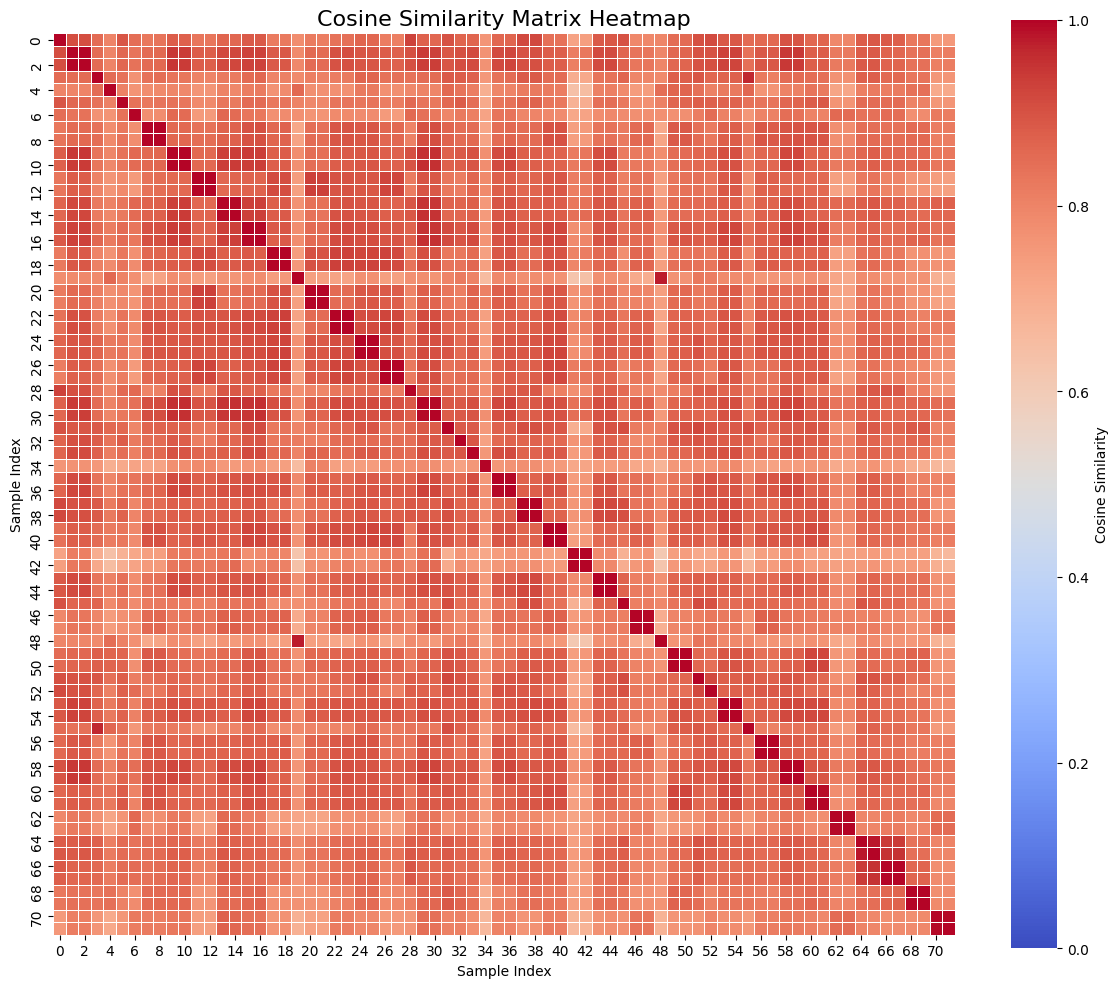

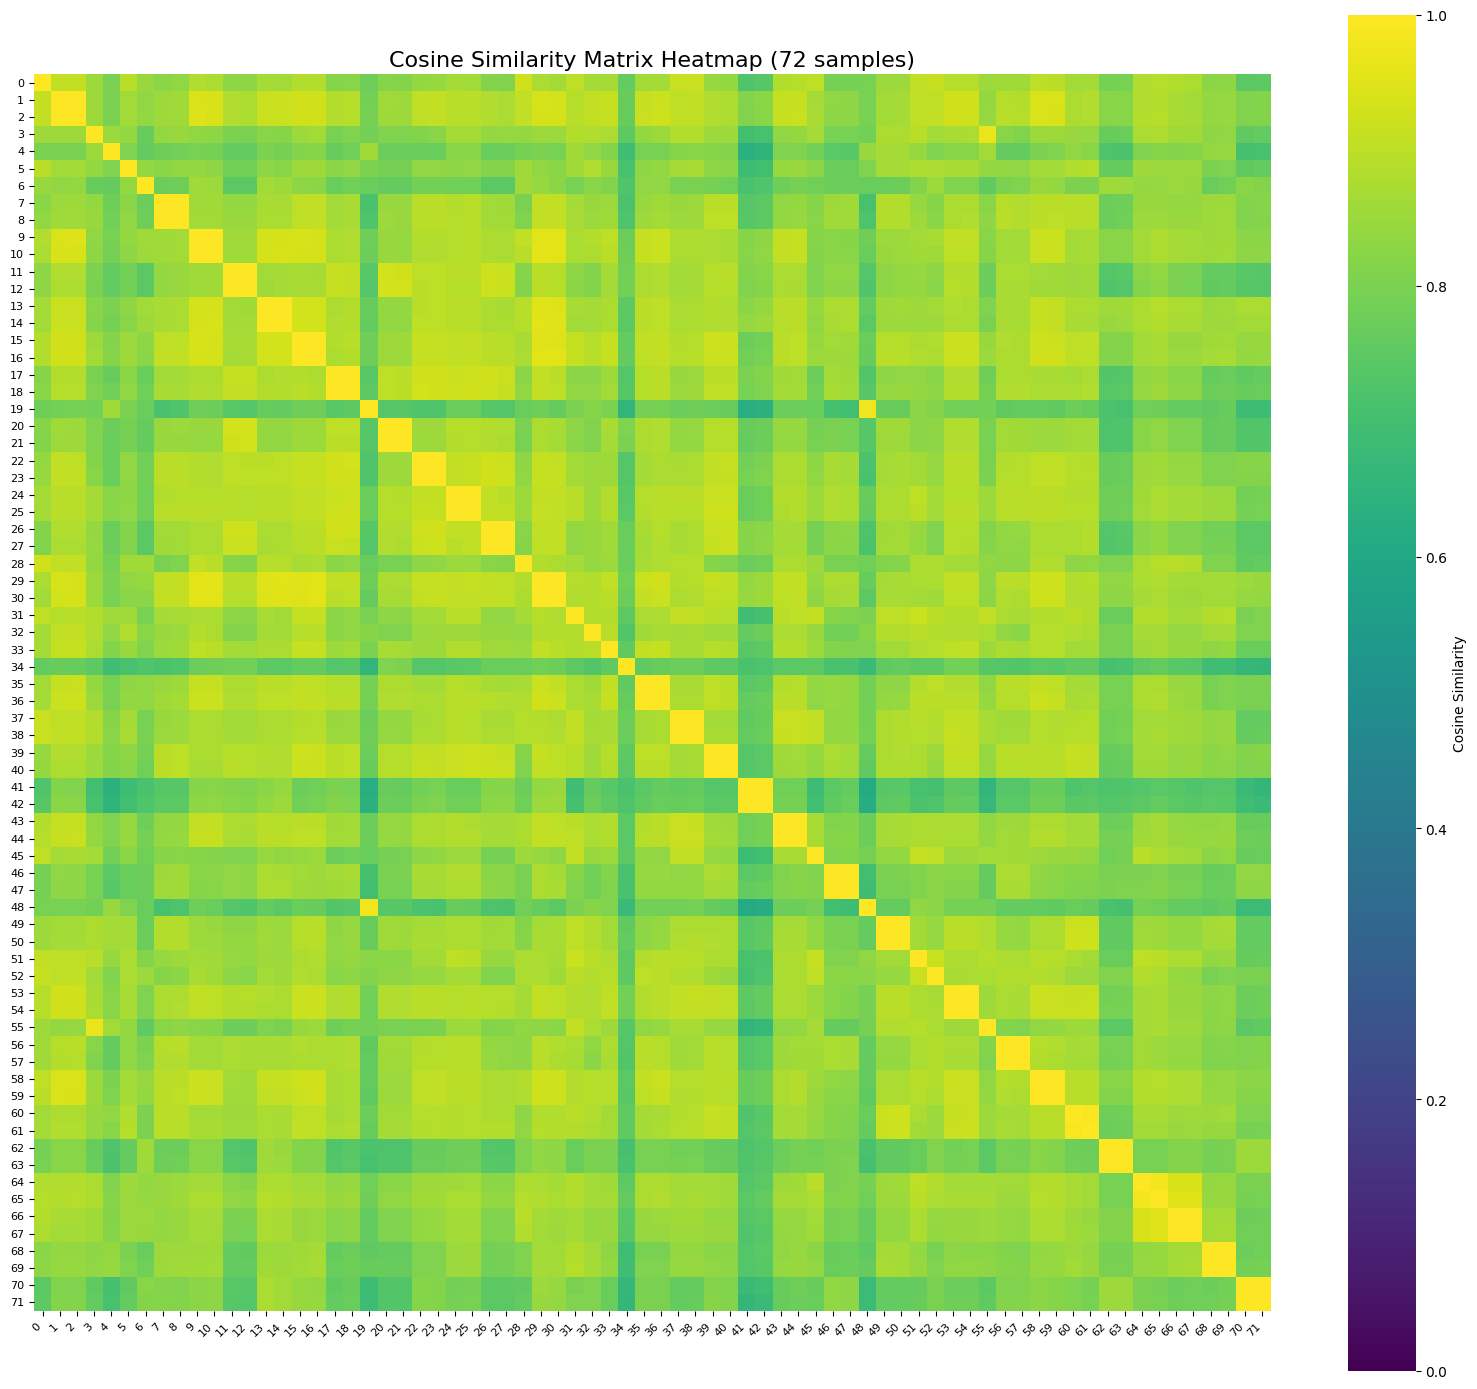

In [21]:
# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    similarity_df,
    cmap='coolwarm',
    center=0.5,
    vmin=0,
    vmax=1,
    square=True,
    cbar_kws={'label': 'Cosine Similarity'},
    linewidths=0.5
)
plt.title('Cosine Similarity Matrix Heatmap', fontsize=16)
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')
plt.tight_layout()
plt.show()

# For 72 samples, use numeric indices with larger figure
plt.figure(figsize=(16, 14))
sns.heatmap(
    similarity_df,
    cmap='viridis',
    vmin=0,
    vmax=1,
    square=True,
    cbar_kws={'label': 'Cosine Similarity'},
    annot=False,
    xticklabels=True,
    yticklabels=True
)
plt.title('Cosine Similarity Matrix Heatmap (72 samples)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

In [51]:
# Add column for year of data into dataframe

news_results_df['year'] = ''
news_results_df['year'] = pd.to_datetime(news_results_df['year'])

for id, row in news_results_df.iterrows():
  if '2024' in row.source:
    news_results_df.at[id, 'year'] = 2024
  else:
    news_results_df.at[id, 'year'] = 2025

/tmp/ipython-input-850125079.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2024' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  news_results_df.at[id, 'year'] = 2024


In [52]:
news_results_df.year.values

array([2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2024, 2024, 2025, 20

In [53]:
news_results_df = news_results_df[['source', 'id', 'year', 'url', 'parent_url', 'cc_url', 'content_truncated',
       'result', 'result_text', 'bert_embedding']]

In [54]:
news_results_df.columns

Index(['source', 'id', 'year', 'url', 'parent_url', 'cc_url',
       'content_truncated', 'result', 'result_text', 'bert_embedding'],
      dtype='object')

In [55]:
news_results_df

source   id  year  \
0    df_selected_urls_2024_p1   80  2024   
1    df_selected_urls_2024_p1  261  2024   
2    df_selected_urls_2024_p1  261  2024   
3    df_selected_urls_2024_p1  261  2024   
4    df_selected_urls_2024_p1  261  2024   
..                        ...  ...   ...   
159     df_news_filtered_2025  872  2025   
160     df_news_filtered_2025  872  2025   
161     df_news_filtered_2025  872  2025   
162     df_news_filtered_2025  886  2025   
163     df_news_filtered_2025  886  2025   

                                                   url  parent_url  \
0    https://www.gov.uk/government/news/graham-alle...  www.gov.uk   
1    https://www.gov.uk/government/news/first-speci...  www.gov.uk   
2    https://www.gov.uk/government/news/first-speci...  www.gov.uk   
3    https://www.gov.uk/government/news/first-speci...  www.gov.uk   
4    https://www.gov.uk/government/news/first-speci...  www.gov.uk   
..                                                 ...         ...   
159  https://www.gov.uk/government/news/schools-col...  www.gov.uk   
160  https://www.gov.uk/government/news/schools-col...  www.gov.uk   
161  https://www.gov.uk/government/news/schools-col...  www.gov.uk   
162  https://www.gov.uk/government/news/employment-...  www.gov.uk   
163  https://www.gov.uk/government/news/employment-...  www.gov.uk   

                                                cc_url  \
0    https://data.commoncrawl.org/crawl-data/CC-MAI...   
1    https://data.commoncrawl.org/crawl-data/CC-MAI...   
2    https://data.commoncrawl.org/crawl-data/CC-MAI...   
3    https://data.commoncrawl.org/crawl-data/CC-MAI...   
4    https://data.commoncrawl.org/crawl-data/CC-MAI...   
..                                                 ...   
159  https://data.commoncrawl.org/crawl-data/CC-MAI...   
160  https://data.commoncrawl.org/crawl-data/CC-MAI...   
161  https://data.commoncrawl.org/crawl-data/CC-MAI...   
162  https://data.commoncrawl.org/crawl-data/CC-MAI...   
163  https://data.commoncrawl.org/crawl-data/CC-MAI...   

                                     content_truncated             result  \
0    graham allen launches second report on early i...         Sure Start   
1    first special and alternative provision free s...  free school meals   
2    first special and alternative provision free s...  free school meals   
3    first special and alternative provision free s...       School meals   
4    first special and alternative provision free s...       School meals   
..                                                 ...                ...   
159  schools, colleges and early years settings to ...  free school meals   
160  schools, colleges and early years settings to ...       School meals   
161  schools, colleges and early years settings to ...       School meals   
162  employment support launched for over a million...  free school meals   
163  employment support launched for over a million...       School meals   

                                           result_text  \
0     we are recruiting 4,200 health visitors and e...   
1    e right for local children. international evid...   
2    ers and heads more freedom in the classroom he...   
3    ht for local children. international evidence ...   
4    nd heads more freedom in the classroom helps t...   
..                                                 ...   
159  or free school meals, schools will be able to ...   
160  e children i am confident we will help beat th...   
161  ee school meals, schools will be able to provi...   
162  losed of individuals who are solely eligible f...   
163   of individuals who are solely eligible for th...   

                                        bert_embedding  
0    [[-0.23141022, -0.108183585, 0.58390605, -0.39...  
1    [[-0.084806375, -0.030957451, 0.5036368, -0.03...  
2    [[-0.12134096, 0.024900362, 0.50204164, -0.080...  
3    [[-0.10100988, -0.027415425, 0.49591455, -0.05...  
4    [[-0.12186139, 0.0025323112, 0.53792256, -0.

In [56]:
import pandas as pd
pd.crosstab(news_results_df['year'], news_results_df['result'])

result  Best Start in Life  School meals  School readiness  Sure Start  \
year                                                                     
2024                     3            54                 3          18   
2025                     1             6                 0           0   

result  breakfast clubs  childcare hours  family hubs  \
year                                                    
2024                  0                1            1   
2025                  1                0            1   

result  free childcare for working parents  free childcare hours  \
year                                                               
2024                                     2                     1   
2025                                     0                     0   

result  free school meals  tax-free childcare  
year                                           
2024                   45                  21  
2025                    6                   0

In [57]:
import numpy as np

In [58]:
policy_embeddings = {}

policy_embeddings[2024] = {}
policy_embeddings[2025] = {}

for id, row in news_results_df.iterrows():
  if row.year == 2024:
    if row.result not in policy_embeddings[2024]:
      policy_embeddings[2024][row.result] = [row.bert_embedding]
    else:
      policy_embeddings[2024][row.result].append(row.bert_embedding)
  else:
    if row.result not in policy_embeddings[2025]:
      policy_embeddings[2025][row.result] = [row.bert_embedding]
    else:
      policy_embeddings[2025][row.result].append(row.bert_embedding)


In [59]:
policy_embeddings

{2024: {'Sure Start': [array([[-2.31410220e-01, -1.08183585e-01,  5.83906054e-01,
           -3.97098422e-01,  1.08138107e-01, -7.61731938e-02,
            2.17296615e-01,  3.78975600e-01, -1.38610646e-01,
           -2.33058497e-01, -2.26874888e-01, -2.22269237e-01,
            7.23009929e-02,  1.55092314e-01,  2.22324967e-01,
            3.28030735e-01,  8.95705447e-02,  7.16760159e-02,
           -3.88609648e-01,  1.60871044e-01,  1.12279274e-01,
           -6.76924661e-02,  7.37043545e-02,  8.68425608e-01,
            5.50663292e-01,  1.49395153e-01,  2.43692160e-01,
           -2.18226805e-01, -4.73459028e-02, -2.33160540e-01,
            7.60421276e-01,  9.40772891e-02, -1.07641585e-01,
           -2.40977645e-01,  3.55031520e-01,  1.76486030e-01,
           -1.70304716e-01, -4.47464585e-02, -3.13688010e-01,
           -2.35922471e-01, -4.62858886e-01, -2.09412709e-01,
           -2.58912861e-01, -2.79212773e-01, -1.63093269e-01,
           -2.97819108e-01,  2.16326818e-01, -2.82

In [66]:
policy_embedding_averages = {}
for key, value in policy_embeddings.items():
  print(key)

  if key not in policy_embedding_averages:
    policy_embedding_averages[key] = {}

  for policy, embeddings in value.items():
    policy_embedding_averages[key][policy] = np.mean(embeddings, axis=0)



2024
2025


In [62]:
policy_embedding_averages

{'Sure Start': array([[-1.13256678e-01, -1.33194951e-02,  4.80135500e-01,
         -2.27125481e-01,  2.78332919e-01, -3.05796526e-02,
          1.02791689e-01,  3.55490804e-01, -1.34942457e-01,
         -1.44883126e-01, -1.50933310e-01, -2.64805436e-01,
          3.50297205e-02,  1.12773813e-01, -6.43273294e-02,
          2.22073853e-01,  1.82887167e-01,  9.31158587e-02,
         -2.94669569e-01,  1.91532671e-01,  1.97954744e-01,
         -1.42428875e-01, -3.78629602e-02,  6.34594917e-01,
          4.54405934e-01, -1.83277652e-02,  1.51410371e-01,
         -1.86546147e-01, -1.61530569e-01, -3.09800416e-01,
          6.03731453e-01,  2.04795331e-01, -1.21888824e-01,
         -1.49641857e-01,  2.53287792e-01,  1.88277848e-02,
         -1.83348149e-01, -2.05010161e-01, -2.21160322e-01,
          1.36511177e-02, -4.39744920e-01, -2.53275871e-01,
         -2.03664318e-01, -1.65135562e-01, -1.98961720e-01,
         -2.41470635e-01,  2.67740130e-01, -1.24243364e-01,
          1.82113856e-01, 

In [69]:
policy_embedding_averages = {}
for key, value in policy_embeddings.items():
  print(key)
  if key not in policy_embedding_averages:
    policy_embedding_averages[key] = {}
  for policy, value in value.items():
    print(policy)
    policy_embedding_averages[key][policy] = np.mean(value, axis=0)

2024
Sure Start
free school meals
School meals
Best Start in Life
tax-free childcare
family hubs
childcare hours
free childcare hours
School readiness
free childcare for working parents
2025
free school meals
School meals
breakfast clubs
Best Start in Life
family hubs


In [77]:
policy_embedding_averages

{2024: {'Sure Start': array([[-1.13256678e-01, -1.33194951e-02,  4.80135500e-01,
          -2.27125481e-01,  2.78332919e-01, -3.05796526e-02,
           1.02791689e-01,  3.55490804e-01, -1.34942457e-01,
          -1.44883126e-01, -1.50933310e-01, -2.64805436e-01,
           3.50297205e-02,  1.12773813e-01, -6.43273294e-02,
           2.22073853e-01,  1.82887167e-01,  9.31158587e-02,
          -2.94669569e-01,  1.91532671e-01,  1.97954744e-01,
          -1.42428875e-01, -3.78629602e-02,  6.34594917e-01,
           4.54405934e-01, -1.83277652e-02,  1.51410371e-01,
          -1.86546147e-01, -1.61530569e-01, -3.09800416e-01,
           6.03731453e-01,  2.04795331e-01, -1.21888824e-01,
          -1.49641857e-01,  2.53287792e-01,  1.88277848e-02,
          -1.83348149e-01, -2.05010161e-01, -2.21160322e-01,
           1.36511177e-02, -4.39744920e-01, -2.53275871e-01,
          -2.03664318e-01, -1.65135562e-01, -1.98961720e-01,
          -2.41470635e-01,  2.67740130e-01, -1.24243364e-01,
    

In [72]:
policy_embedding_averages.keys()

dict_keys([2024, 2025])

In [82]:
both_years_policies = ['free school meals', 'School meals', 'breakfast clubs', 'Best Start in Life', 'family hubs']
master_comparison_embeddings = {}

for key, value in policy_embedding_averages.items():
  print(key)
  if key not in master_comparison_embeddings:
    master_comparison_embeddings[key] = {}
  print(value.keys())
  for policy, embedding in value.items():
    print(policy)
    if policy in both_years_policies:
      master_comparison_embeddings[key][policy] = embedding


2024
dict_keys(['Sure Start', 'free school meals', 'School meals', 'Best Start in Life', 'tax-free childcare', 'family hubs', 'childcare hours', 'free childcare hours', 'School readiness', 'free childcare for working parents'])
Sure Start
free school meals
School meals
Best Start in Life
tax-free childcare
family hubs
childcare hours
free childcare hours
School readiness
free childcare for working parents
2025
dict_keys(['free school meals', 'School meals', 'breakfast clubs', 'Best Start in Life', 'family hubs'])
free school meals
School meals
breakfast clubs
Best Start in Life
family hubs


In [83]:
master_comparison_embeddings

{2024: {'free school meals': array([[-2.47089535e-01,  5.46481786e-03,  4.37140793e-01,
          -2.06929103e-01,  2.30556026e-01,  1.41837448e-01,
           3.61720949e-01,  5.00648379e-01, -1.39428079e-01,
          -4.36166599e-02, -2.17968628e-01, -3.18454862e-01,
          -4.75407243e-02,  7.43681118e-02, -2.98392435e-04,
           1.35264158e-01,  4.10922825e-01, -6.59414195e-03,
          -3.81867468e-01,  7.50728473e-02,  1.70864180e-01,
          -1.15880139e-01, -1.01136275e-01,  7.24000096e-01,
           6.08937562e-01, -1.76249128e-02,  2.19026104e-01,
          -1.72004029e-01, -9.14510861e-02, -3.28315377e-01,
           6.22668087e-01,  2.46133164e-01, -7.32611269e-02,
          -1.02505766e-01,  1.73004061e-01,  7.14956149e-02,
          -2.49660879e-01, -3.18701416e-01, -1.74858913e-01,
          -1.19911201e-01, -5.27326763e-01, -2.71350682e-01,
          -2.03155324e-01, -1.04319148e-01, -1.99230611e-01,
          -2.61226237e-01,  4.45629030e-01,  7.09025189e-0

In [86]:
# make dataframe from dict

df_compare_embeddings = pd.DataFrame(columns=['policy', 'year', 'embedding'])

for key, value in master_comparison_embeddings.items():
  print(key)
  print(value.keys())
  for policy, embedding in value.items():
    print(policy)

    df_compare_embeddings = pd.concat([df_compare_embeddings, pd.DataFrame([{'policy': policy, 'year': key, 'embedding': embedding}])], ignore_index=True)



2024
dict_keys(['free school meals', 'School meals', 'Best Start in Life', 'family hubs'])
free school meals
School meals
Best Start in Life
family hubs
2025
dict_keys(['free school meals', 'School meals', 'breakfast clubs', 'Best Start in Life', 'family hubs'])
free school meals
School meals
breakfast clubs
Best Start in Life
family hubs


In [87]:
df_compare_embeddings

policy  year                                          embedding
0   free school meals  2024  [[-0.24708953, 0.005464818, 0.4371408, -0.2069...
1        School meals  2024  [[-0.21958487, -0.012872739, 0.4296098, -0.182...
2  Best Start in Life  2024  [[-0.0071752616, 0.022656858, 0.30691192, -0.1...
3         family hubs  2024  [[-0.29577866, -0.23488998, 0.6919514, -0.4542...
4   free school meals  2025  [[-0.070122786, 0.04046004, 0.40427744, -0.035...
5        School meals  2025  [[-0.06531926, 0.038422782, 0.4111654, -0.0215...
6     breakfast clubs  2025  [[-0.16583991, -0.12736085, 0.474279, -0.26171...
7  Best Start in Life  2025  [[-0.31460842, -0.033323098, 0.3116774, -0.361...
8         family hubs  2025  [[-0.31637493, -0.16737117, 0.38424918, -0.378...

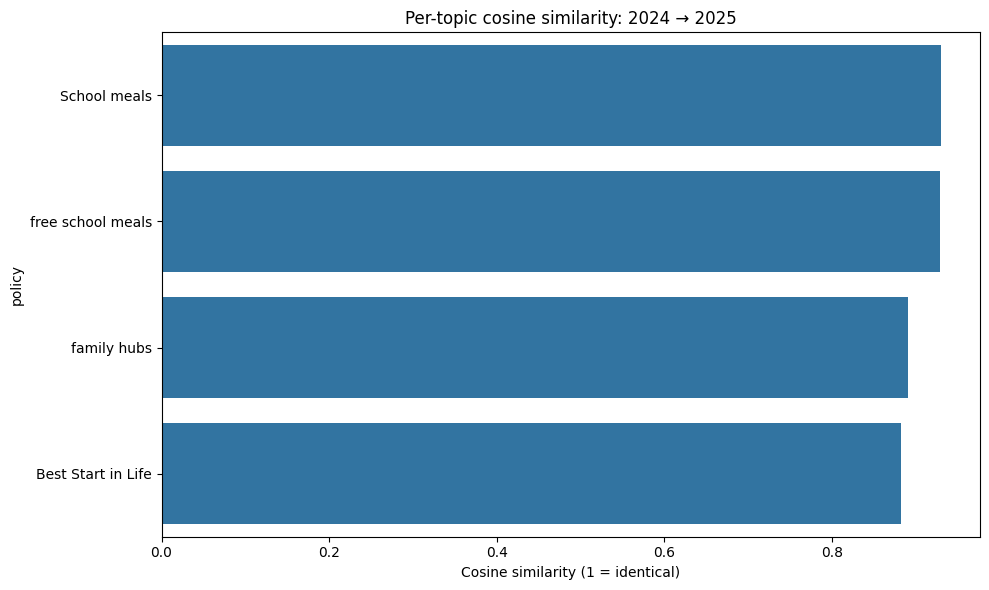

In [118]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- USER PARAMETERS ----------
year_a = 2024   # set first year
year_b = 2025   # set second year
# -------------------------------------

# Example: df = pd.DataFrame({'topic':..., 'year':..., 'embedding':[...]})

# 1) Ensure embeddings are numpy arrays
df = df_compare_embeddings.copy()
df['embedding'] = df['embedding'].apply(lambda e: np.array(e, dtype=float))

# 2) If multiple rows per (topic, year), average them
agg = df.groupby(['policy','year'])['embedding'].apply(
    lambda arrs: np.mean(np.vstack(arrs), axis=0)
).reset_index()   # columns: topic, year, embedding

# 3) Build dictionaries for the two years
df_a = agg[agg['year'] == year_a].set_index('policy')
df_b = agg[agg['year'] == year_b].set_index('policy')

topics_a = sorted(df_a.index.tolist())
topics_b = sorted(df_b.index.tolist())

# 4) Per-topic similarity (only topics present in both years)
common_topics = sorted(list(set(topics_a).intersection(topics_b)))

per_topic_sim = []
for topic in common_topics:
    v1 = df_a.loc[topic, 'embedding']
    v2 = df_b.loc[topic, 'embedding']
    # cosine similarity (safe numerical)
    sim = (v1 @ v2) / (np.linalg.norm(v1) * np.linalg.norm(v2) + 1e-12)
    per_topic_sim.append((topic, float(sim)))
per_topic_df = pd.DataFrame(per_topic_sim, columns=['policy','cosine_similarity']).sort_values('cosine_similarity', ascending=False)

# 5) Cross-year topic × topic similarity matrix (rows = topics in year_a, cols = topics in year_b)
mat = np.zeros((len(topics_a), len(topics_b)))
emb_a = np.vstack([df_a.loc[t,'embedding'] for t in topics_a])
emb_b = np.vstack([df_b.loc[t,'embedding'] for t in topics_b])

# use sklearn for stability
sim_matrix = cosine_similarity(emb_a, emb_b)  # shape (len(topics_a), len(topics_b))
cross_df = pd.DataFrame(sim_matrix, index=topics_a, columns=topics_b)

# ---------- VISUALISATIONS ----------

# A) Barplot: per-topic similarity (only topics present in both years)
plt.figure(figsize=(10,6))
sns.barplot(data=per_topic_df, x='cosine_similarity', y='policy')
plt.title(f'Per-topic cosine similarity: {year_a} → {year_b}')
plt.xlabel('Cosine similarity (1 = identical)')
plt.tight_layout()
plt.show()




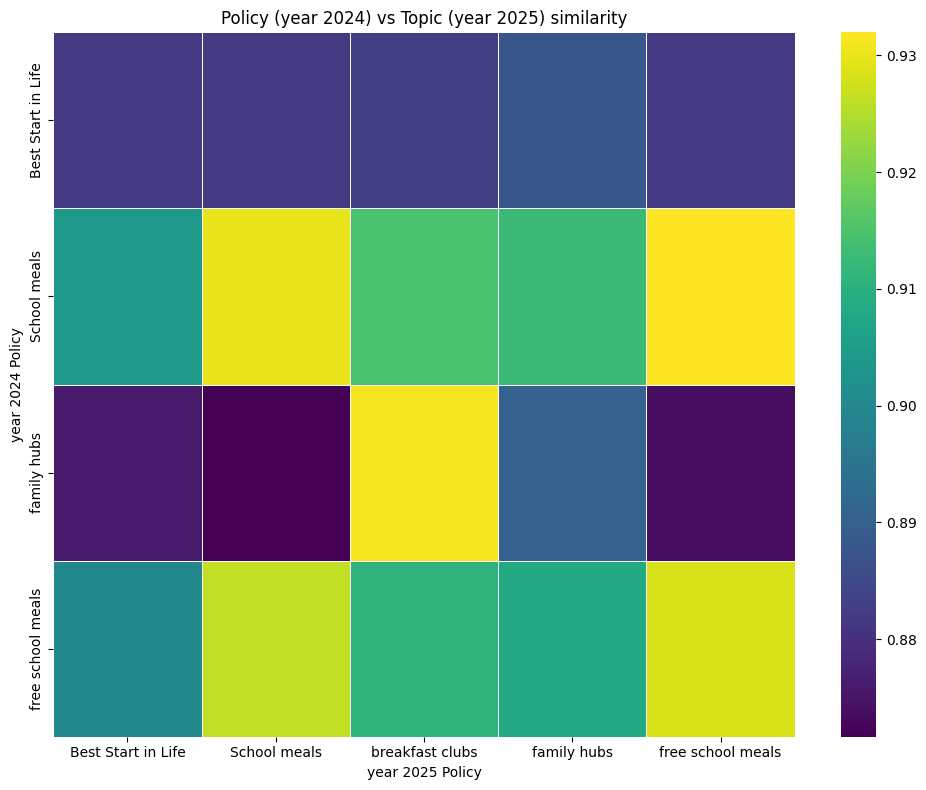

In [119]:
# B) Heatmap: cross-year similarity matrix
plt.figure(figsize=(10,8))
sns.heatmap(cross_df, annot=False, cmap='viridis', linewidths=.5)
plt.title(f'Policy (year {year_a}) vs Topic (year {year_b}) similarity')
plt.xlabel(f'year {year_b} Policy')
plt.ylabel(f'year {year_a} Policy')
plt.tight_layout()
plt.show()


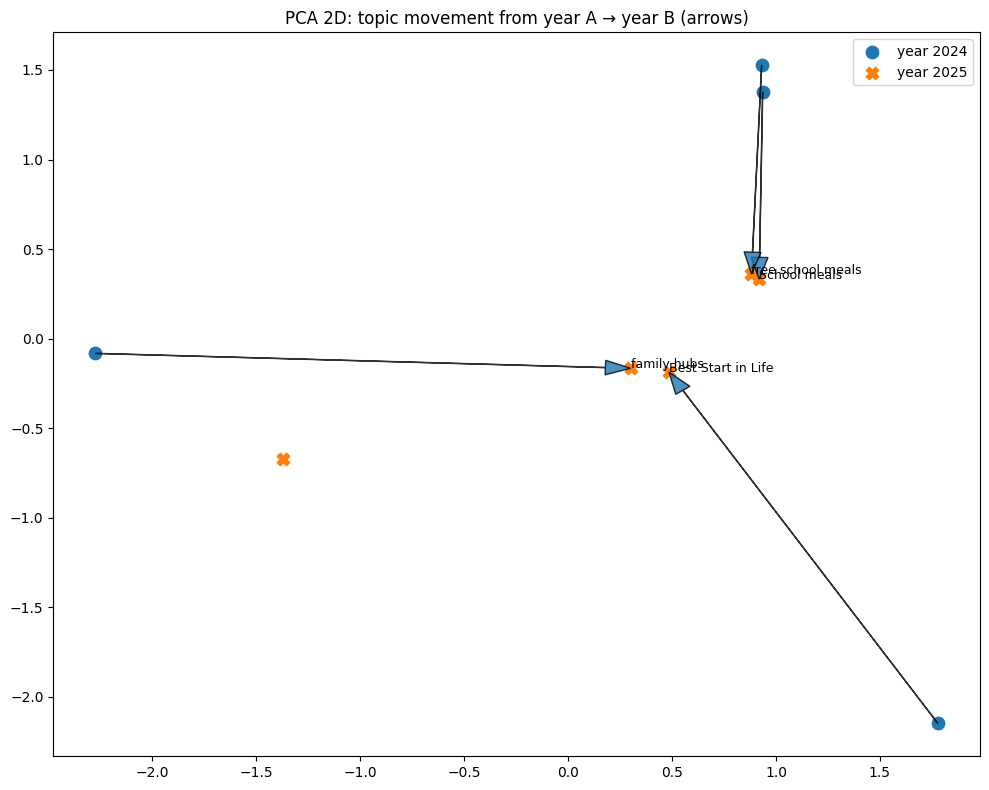

In [120]:
# C) 2D PCA with arrows showing movement of common topics
# stack embeddings for PCA
all_topics = list(dict.fromkeys(topics_a + topics_b))  # preserve order
# We'll create pairs for only common topics to draw arrows
pca = PCA(n_components=2)
all_emb = np.vstack([df_a.loc[t,'embedding'] if t in df_a.index else df_b.loc[t,'embedding'] for t in all_topics])
pca.fit(all_emb)

plt.figure(figsize=(10,8))
# plot points for year A and year B separately (only for topics that exist)
coords_a = pca.transform(np.vstack([df_a.loc[t,'embedding'] for t in topics_a]))
coords_b = pca.transform(np.vstack([df_b.loc[t,'embedding'] for t in topics_b]))

plt.scatter(coords_a[:,0], coords_a[:,1], marker='o', label=f'year {year_a}', s=80)
plt.scatter(coords_b[:,0], coords_b[:,1], marker='X', label=f'year {year_b}', s=80)

# draw arrows for common topics
for topic in common_topics:
    pa = pca.transform(df_a.loc[topic,'embedding'].reshape(1,-1))[0]
    pb = pca.transform(df_b.loc[topic,'embedding'].reshape(1,-1))[0]
    plt.arrow(pa[0], pa[1], (pb[0]-pa[0]), (pb[1]-pa[1]), head_width=0.02*np.ptp(coords_a[:,0]), length_includes_head=True, alpha=0.8)
    plt.text(pb[0], pb[1], topic, fontsize=9)

plt.title('PCA 2D: topic movement from year A → year B (arrows)')
plt.legend()
plt.tight_layout()
plt.show()

# ---------- OUTPUTS ----------
# per_topic_df : DataFrame with topic and cosine_similarity
# cross_df : DataFrame (topics in year_a x topics in year_b) with pairwise cosines

In [121]:

# save df to pickle

import pickle

with open('news_results_df_friday_interim_results.pkl', 'wb') as file:
    pickle.dump(news_results_df, file)

In [24]:
'''
# import from pickle
import pickle

with open('news_results_df_friday_interim_results.pkl', 'rb') as file:
    news_results_df = pickle.load(file)

In [122]:
# export csv of dataframe

news_results_df.to_csv('news_results_df_friday_interim_results.csv')